In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./special_symbols_100000.csv", encoding='latin1', usecols=lambda column: column != 'URL')
data.head()

,is_ip,server_client_domain,email_in_url,response_time,qty_ip_resolved,tls_ssl_certificate,qty_redirects,url_shortened,url_google_index,domain_spf,...,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,length_url,phishing
0,0,0,0,1.524822,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,66,0
1,0,0,0,0.187566,1,0,0,0,1,-1,...,0,0,0,0,0,0,0,0,29,0
2,0,1,0,2.756260,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,46,0
3,0,0,0,2.408794,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,48,0
4,0,0,0,0.725262,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,42,0


In [3]:
data.shape

(99207, 39)

In [4]:
data['qty_tld_url'] = pd.to_numeric(data['qty_tld_url'], errors='coerce', downcast='integer').fillna(0).astype(int)

In [5]:
nulldata = data.isnull().sum()
print(nulldata)
nulldata[nulldata>0]

is_ip                     0
server_client_domain      0
email_in_url              0
response_time             0
qty_ip_resolved           0
tls_ssl_certificate       0
qty_redirects             0
url_shortened             0
url_google_index          0
domain_spf                0
tld_presencet_params      0
ttl_value                 0
asn_ip                    0
qty_tld_url               0
time_domain_activation    0
time_domain_expiration    0
qty_mx_servers            0
qty_hashtag_url           0
qty_underline_domain      0
unsimiler                 0
tld_class                 0
qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_questionmark_url      0
qty_equal_url             0
qty_at_url                0
qty_and_url               0
qty_exclamation_url       0
qty_space_url             0
qty_tilde_url             0
qty_comma_url             0
qty_plus_url              0
qty_asterisk_url          0
qty_dollar_url      

Series([], dtype: int64)

In [6]:
x = data.drop(columns = 'phishing')
y = data[['phishing']]
x.shape, y.shape

((99207, 38), (99207, 1))

### Splitting Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 99)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((69444, 38), (29763, 38), (69444, 1), (29763, 1))

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')

In [9]:
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [10]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8165171521688002

In [11]:
classifier.score(x_train,y_train)

0.8136196071654859

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (col != 'phishing'):
        col_list.append(col)
        
X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]

print(vif_data)

                   feature       VIF
0                    is_ip  5.538269
1     server_client_domain  1.003632
2             email_in_url  2.117803
3            response_time  1.694907
4          qty_ip_resolved  1.285574
5      tls_ssl_certificate  1.758124
6            qty_redirects       NaN
7            url_shortened       NaN
8         url_google_index  1.020142
9               domain_spf  1.621111
10    tld_presencet_params  5.539655
11               ttl_value  1.050996
12                  asn_ip  1.044650
13             qty_tld_url  1.307377
14  time_domain_activation  0.000000
15  time_domain_expiration  0.000000
16          qty_mx_servers  1.629807
17         qty_hashtag_url  1.003757
18    qty_underline_domain  1.005531
19               unsimiler  1.249489
20               tld_class  1.291496
21             qty_dot_url  1.718549
22          qty_hyphen_url  1.254512
23       qty_underline_url  1.212825
24           qty_slash_url  1.304713
25    qty_questionmark_url  2.228576
2

In [63]:
# FI = vif_data[(vif_data['VIF'] < 5)]
FI = vif_data[(vif_data['VIF'] < 5) & (vif_data['VIF'] != 0)]
FI

,feature,VIF
1,server_client_domain,1.003632
2,email_in_url,2.117803
3,response_time,1.694907
4,qty_ip_resolved,1.285574
5,tls_ssl_certificate,1.758124
8,url_google_index,1.020142
9,domain_spf,1.621111
11,ttl_value,1.050996
12,asn_ip,1.044650
13,qty_tld_url,1.307377


In [57]:
x = data[FI.feature]
x.shape

,server_client_domain,email_in_url,response_time,qty_ip_resolved,tls_ssl_certificate,url_google_index,domain_spf,ttl_value,asn_ip,qty_tld_url,...,qty_questionmark_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_plus_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,length_url
0,0,0,1.524822,1,1,1,1,3598,1,3,...,0,0,0,0,0,0,0,0,0,66
1,0,0,0.187566,1,0,1,-1,17845,1,2,...,0,0,0,0,0,0,0,0,0,29
2,1,0,2.756260,1,1,1,1,295,1,3,...,0,0,0,0,0,0,0,0,0,46
3,0,0,2.408794,1,1,1,1,3011,1,3,...,0,0,0,0,0,0,0,0,0,48
4,0,0,0.725262,1,0,1,1,6616,1,3,...,0,0,0,0,0,0,0,0,0,42


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((69444, 29), (29763, 29), (69444, 1), (29763, 1))

### importing Classifiers

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
LogReg = LogisticRegression(solver = 'liblinear')
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
Naive = BernoulliNB()
SVC = LinearSVC()
XGBoost = XGBClassifier()
LightGBM = LGBMClassifier()
MLP = MLPClassifier()

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [45]:
def model_development(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"Test Score = {accuracy_score(y_test,y_pred)}\n")
    print(f"Train Score = {model.score(x_train,y_train)}\n")
    print(f"Classification Report = \n{classification_report(y_test,y_pred)}\n")
    cm = confusion_matrix(y_test,y_pred,labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    print("Confusion Matrix:\n")
    disp.plot()
    plt.show()
    print(f"ROC AUC Score = {roc_auc_score(y_test,y_pred)}\n")
    print(RocCurveDisplay.from_predictions(y_test,y_pred),"\n")
    roc_curve_display = RocCurveDisplay.from_estimator(model,x_test,y_test)
    print(roc_curve_display,"\n")
    print(f"AUC score from estimators = {roc_curve_display.roc_auc}")
    return {"Training Score":model.score(x_train,y_train),
            "Testing Score":accuracy_score(y_test,y_pred),
            "Recall":report['1']['recall'],
            "Classifier AUC score":roc_auc_score(y_test,y_pred),
            "Estimator AUC score":roc_curve_display.roc_auc}

In [46]:
results = {}

### Logistic Regression

Test Score = 0.8123173067231126

Train Score = 0.8144692126029607

Classification Report = 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     14811
           1       0.84      0.77      0.80     14952

    accuracy                           0.81     29763
   macro avg       0.81      0.81      0.81     29763
weighted avg       0.81      0.81      0.81     29763


Confusion Matrix:



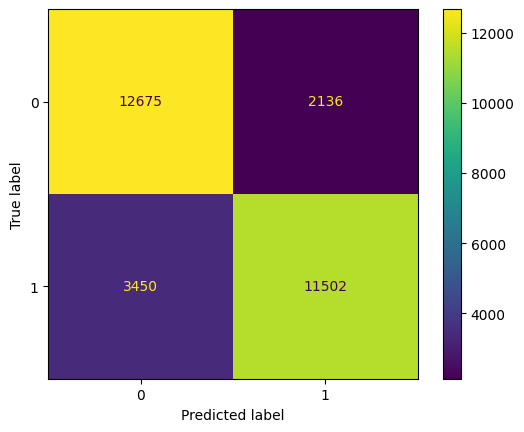

ROC AUC Score = 0.8125222506633338



AUC score from estimators = 0.8862398858938119


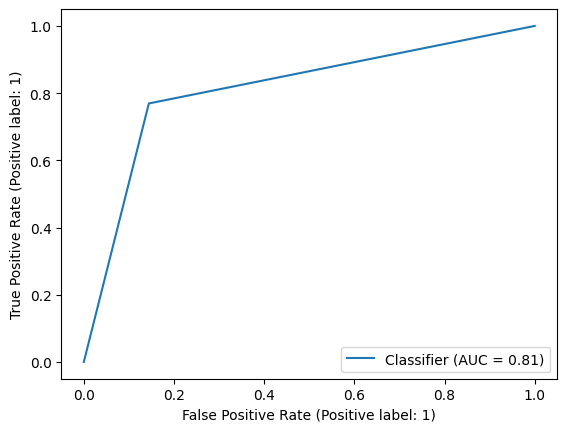

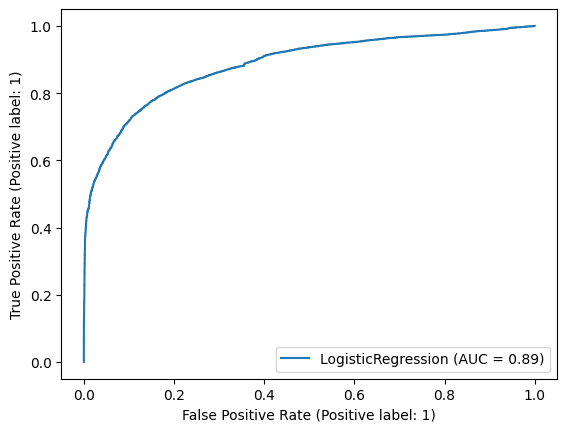

In [47]:
results['Logistic Regression'] = model_development(LogReg)

### Decision Tree


Test Score = 0.8739374391022411

Train Score = 0.9872991187143598

Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14811
           1       0.88      0.87      0.87     14952

    accuracy                           0.87     29763
   macro avg       0.87      0.87      0.87     29763
weighted avg       0.87      0.87      0.87     29763


Confusion Matrix:



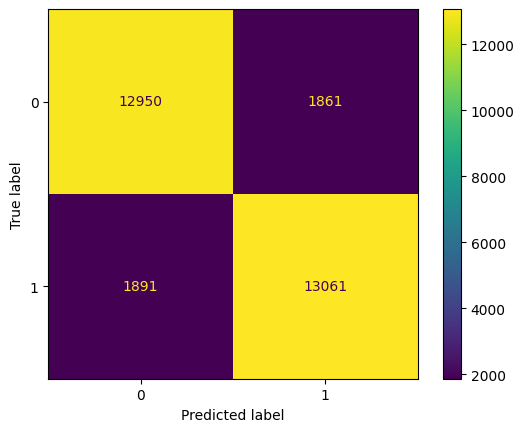

ROC AUC Score = 0.8739393850477494



AUC score from estimators = 0.885878899079354


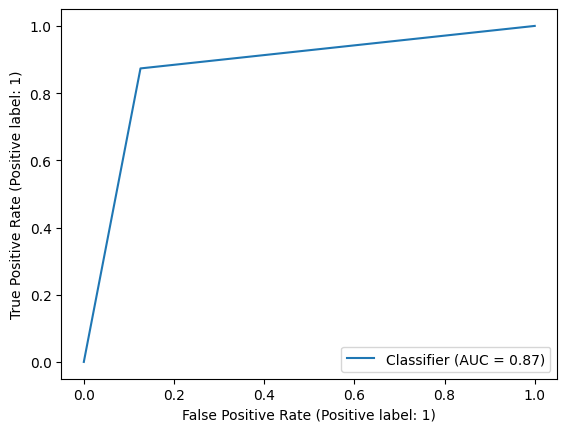

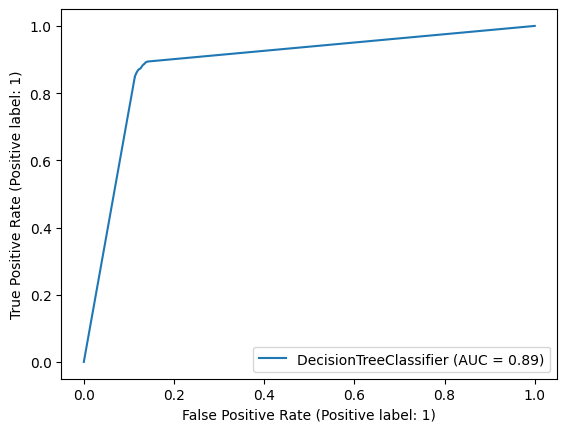

In [48]:
results['Decision Tree'] = model_development(DecisionTree)

### Random Forest Classifier

Test Score = 0.9114672580049055

Train Score = 0.9872991187143598

Classification Report = 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14811
           1       0.92      0.90      0.91     14952

    accuracy                           0.91     29763
   macro avg       0.91      0.91      0.91     29763
weighted avg       0.91      0.91      0.91     29763


Confusion Matrix:



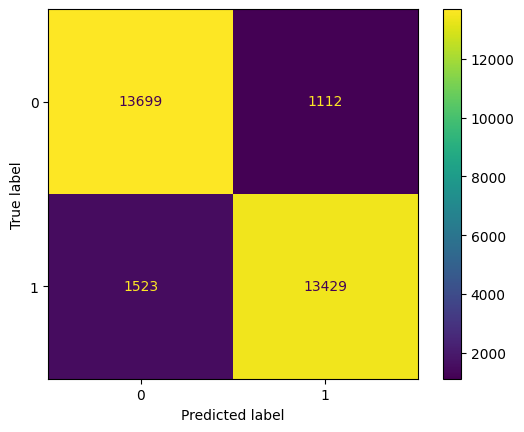

ROC AUC Score = 0.9115306920163564



AUC score from estimators = 0.9695753302743514


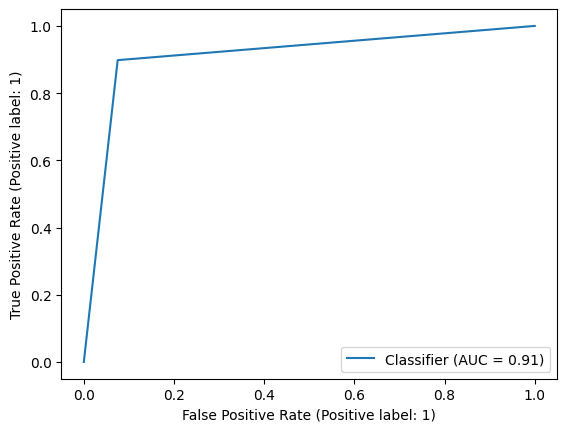

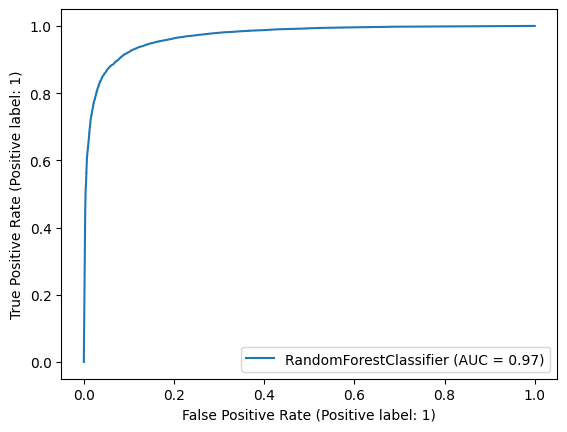

In [49]:
results['Random Forest'] = model_development(RandomForest)

### Naive Bayes

Test Score = 0.7792225246110943

Train Score = 0.7801393928921145

Classification Report = 
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     14811
           1       0.84      0.70      0.76     14952

    accuracy                           0.78     29763
   macro avg       0.79      0.78      0.78     29763
weighted avg       0.79      0.78      0.78     29763


Confusion Matrix:



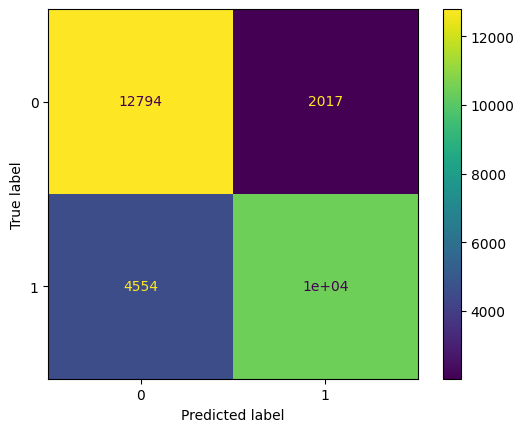

ROC AUC Score = 0.7796213970723466



AUC score from estimators = 0.8425041694424115


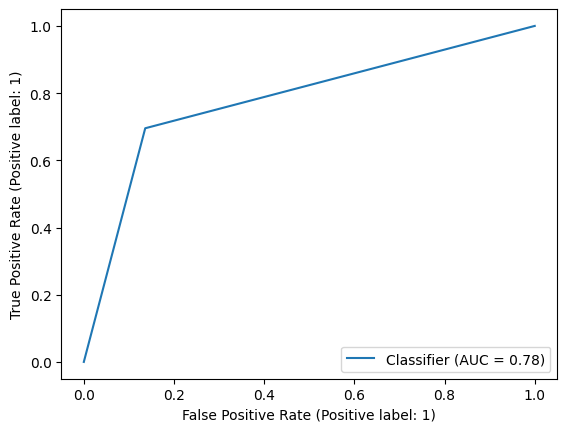

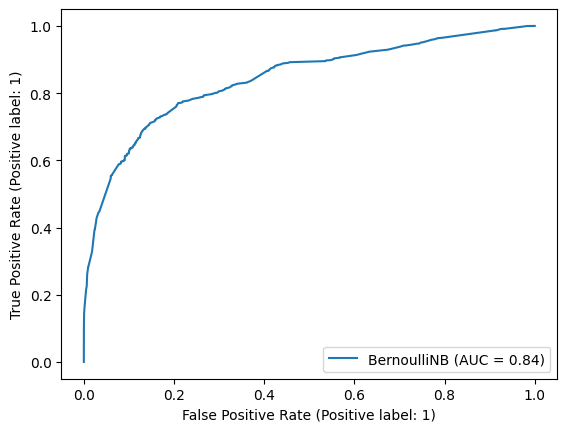

In [50]:
results['Naive Bayes'] = model_development(Naive)

### Support Vector Machine

Test Score = 0.7547626247354098

Train Score = 0.7556592362191118

Classification Report = 
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     14811
           1       0.87      0.60      0.71     14952

    accuracy                           0.75     29763
   macro avg       0.78      0.76      0.75     29763
weighted avg       0.78      0.75      0.75     29763


Confusion Matrix:



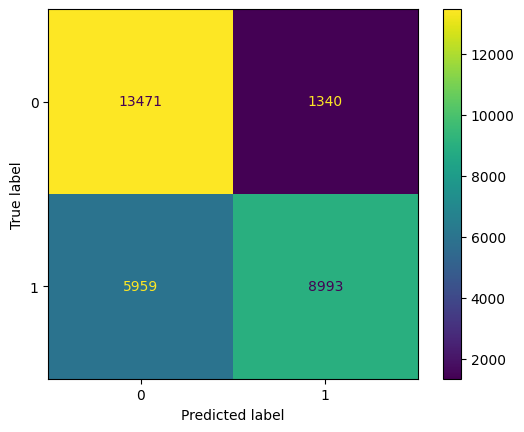

ROC AUC Score = 0.755492351027982



AUC score from estimators = 0.7835243395298688


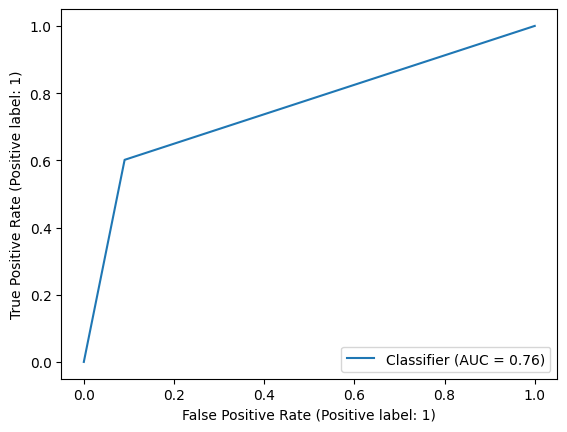

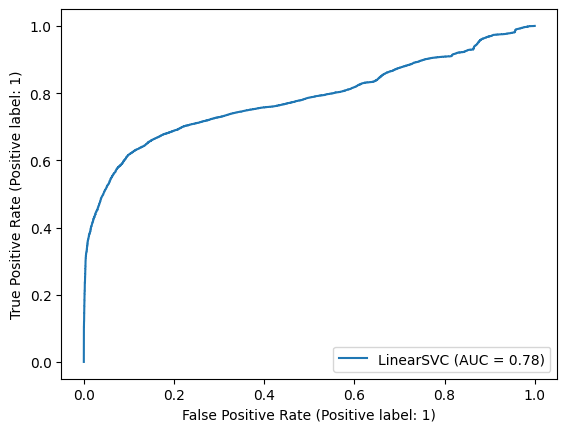

In [51]:
results['Support Vector Machine'] = model_development(SVC)

### XG Boost Classifier

Test Score = 0.9060578570708598

Train Score = 0.9243131156039399

Classification Report = 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     14811
           1       0.91      0.90      0.91     14952

    accuracy                           0.91     29763
   macro avg       0.91      0.91      0.91     29763
weighted avg       0.91      0.91      0.91     29763


Confusion Matrix:



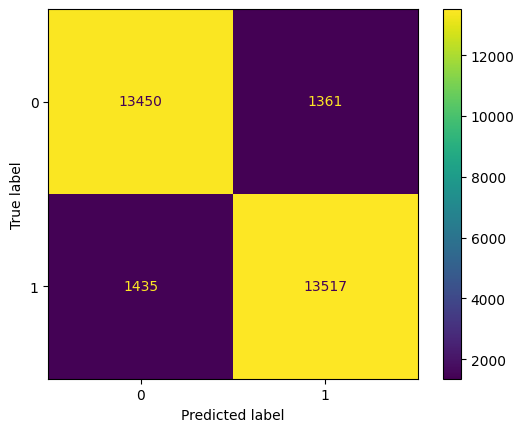

ROC AUC Score = 0.9060675276271282



AUC score from estimators = 0.9702926144433234


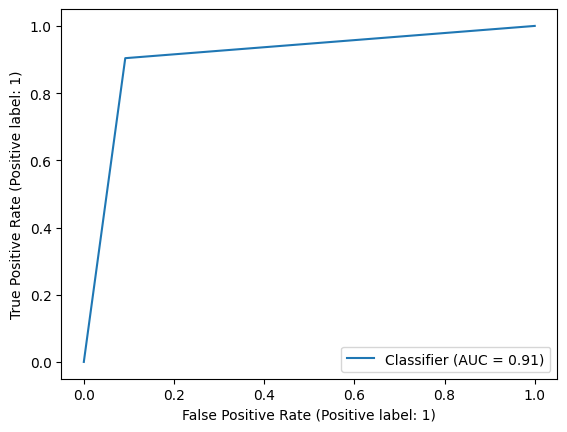

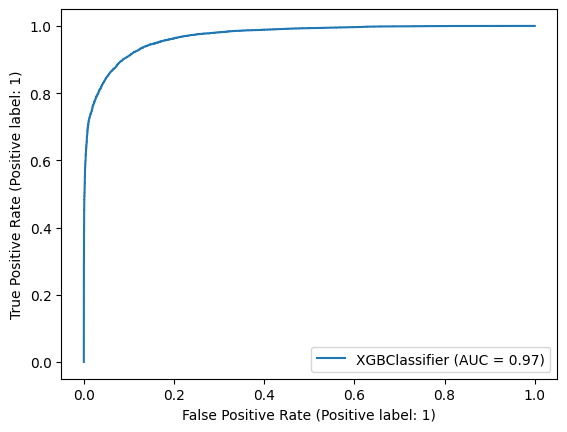

In [52]:
results['XG Boost'] = model_development(XGBoost)

### Light GBM Classifier

[LightGBM] [Info] Number of positive: 34878, number of negative: 34566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 69444, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502246 -> initscore=0.008986
[LightGBM] [Info] Start training from score 0.008986
Test Score = 0.9001780734468972

Train Score = 0.9109498300789125

Classification Report = 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14811
           1       0.90      0.90      0.90     14952

    accuracy                           0.90     29763
   macro avg       0.90      0.90      0.90     29763
weighted avg       0.90      0.90      0.90     29763


Confusion Matrix:



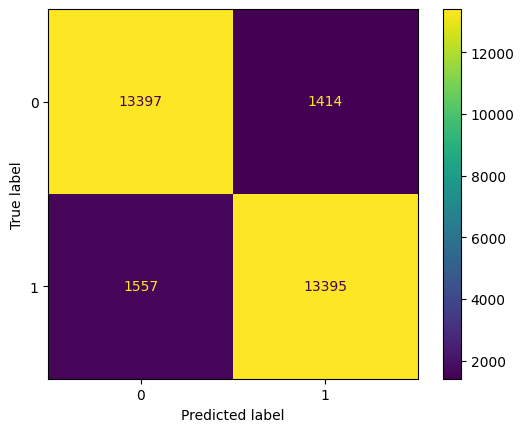

ROC AUC Score = 0.9001985951290162



AUC score from estimators = 0.9671202072093756


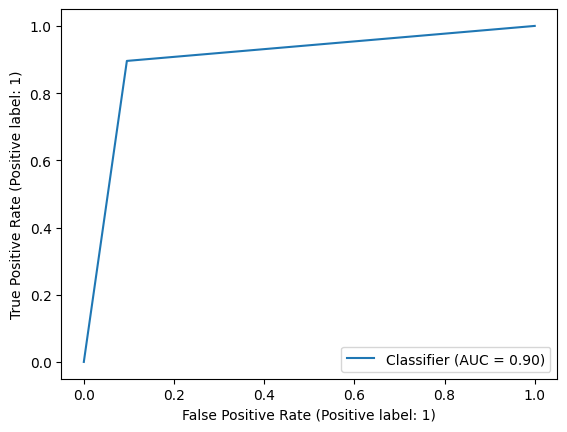

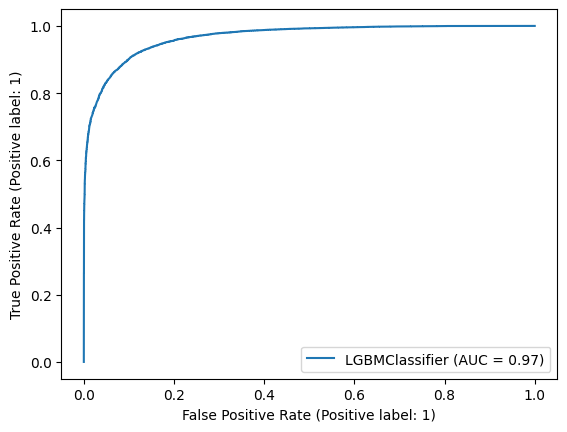

In [53]:
results['Light GBM'] = model_development(LightGBM)

### Multilayer Perceptron Neural Network

Test Score = 0.8197090347075228

Train Score = 0.8207620528771384

Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     14811
           1       0.80      0.85      0.83     14952

    accuracy                           0.82     29763
   macro avg       0.82      0.82      0.82     29763
weighted avg       0.82      0.82      0.82     29763


Confusion Matrix:



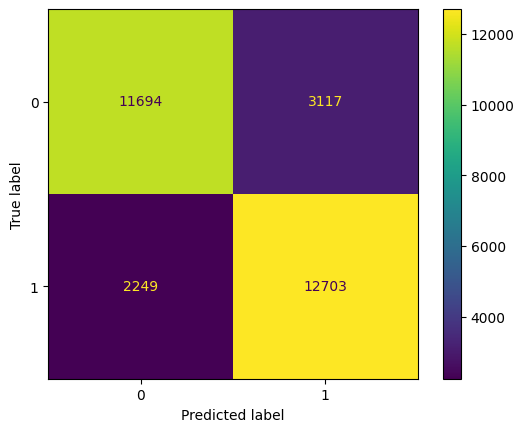

ROC AUC Score = 0.8195668242216834



AUC score from estimators = 0.873760528548782


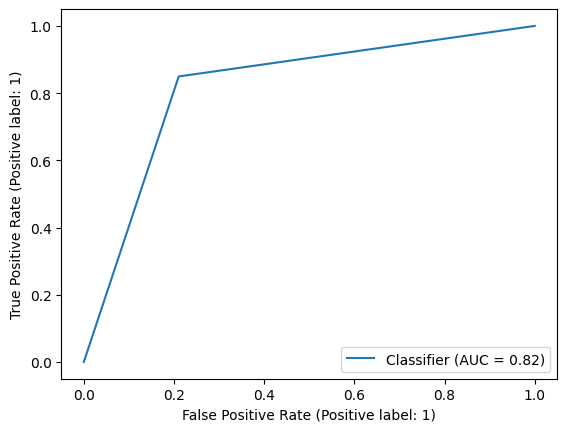

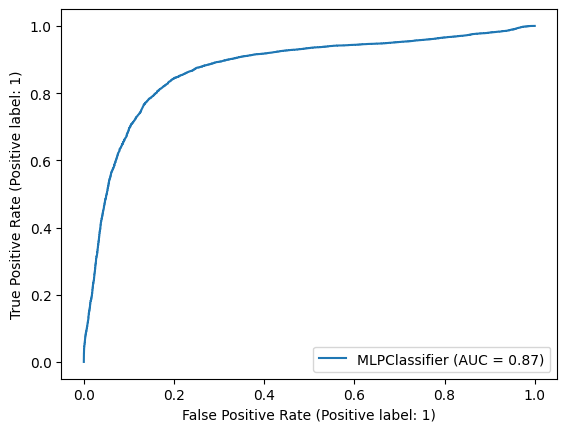

In [54]:
results['MLP Neural Network'] = model_development(MLP)

In [55]:
results_df = pd.DataFrame(results)
results_df 

,Logistic Regression,Decision Tree,Random Forest,Naive Bayes,Support Vector Machine,XG Boost,Light GBM,MLP Neural Network
Training Score,0.814469,0.987299,0.987299,0.780139,0.755659,0.924313,0.910950,0.820762
Testing Score,0.812317,0.873937,0.911467,0.779223,0.754763,0.906058,0.900178,0.819709
Recall,0.769262,0.873529,0.898141,0.695425,0.601458,0.904026,0.895867,0.849585
Classifier AUC score,0.812522,0.873939,0.911531,0.779621,0.755492,0.906068,0.900199,0.819567
Estimator AUC score,0.886240,0.885879,0.969575,0.842504,0.783524,0.970293,0.967120,0.873761


In [80]:
# 讀取數據
bad = pd.read_csv("./edutw.csv", encoding='latin1', usecols=lambda column: column != 'URL')
url = pd.read_csv("./edutw.csv", encoding='latin1', usecols=lambda column: column == 'URL')

bad = bad[FI.feature]
# 進行預測
predicted_results = XGBoost.predict(bad)

# 添加 URL 到預測結果 DataFrame
predicted_result = pd.DataFrame({'URL': url['URL'], 'Predicted_result': predicted_results})

# 保存預測結果到 CSV 文件
predicted_result.to_csv('predicted_result.csv', index=False)

# 將 CSV 文件轉換為文本文件
with open('predicted_result.csv', 'r') as f_in:
    with open('predicted_result.txt', 'w') as f_out:
        for line in f_in:
            f_out.write(line)
bad.head()

,server_client_domain,email_in_url,response_time,qty_ip_resolved,tls_ssl_certificate,url_google_index,domain_spf,ttl_value,asn_ip,qty_tld_url,...,qty_questionmark_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_plus_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,length_url
0,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,22
1,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,23
2,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,23
3,0,0,0.086768,1,1,0,1,73346,1,2,...,0,0,0,0,0,0,0,0,0,23
4,0,0,0.757287,1,1,0,1,21598,1,2,...,0,0,0,0,0,0,0,0,0,22
